**Title: Predicting a Severity of Accident**

*a. Background*

The data used in this project is provided by Seattle Police Department. The goal of this project is to predict the severity of an accident based on the given collision data in the csv file. There are several groups who would be interested in this. To begin the everyday communuters, who would like to know given the factors like weather/ road conditions, the amount of traffic how severe an accident at that given time could be. This can help them develop a plan to take other route or if possible work from home. 

Further, the police department and other first responders would like to know the severity of the accidents to manuver the help that is needed for the victims as soon as possible. 

*b. Elementary Data Analysis:*

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
sns.set(color_codes=True)

In [27]:
df=pd.read_csv("/Users/Avanti/Desktop/Data-Collisions.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [29]:
df.tail(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [30]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [31]:
df.shape

(194673, 38)

In [32]:
import matplotlib.pyplot as plt

*1.Understanding realtionship of some of the major contributors to accident like weather condition, road condition, light condition, speed, kind of accident, to the occurance and severity of an accident.*

*i. Natural conditions: Weather condition, roadcondition and light condition*

In [33]:
df_wthr=df['WEATHER'].value_counts()

In [34]:
df_wthr.head(15)

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [35]:
df_wthr.columns = ['Weather_condition', 'Occurances']
df_wthr.head()

Clear       111135
Raining      33145
Overcast     27714
Unknown      15091
Snowing        907
Name: WEATHER, dtype: int64

In [38]:
%matplotlib inline

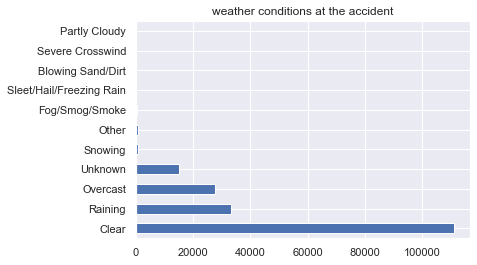

In [41]:
df_wthr.plot(kind='barh', title='weather conditions at the accident', yticks=[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000])

As seen from this plot and above df_wthr that most accidents happened on a clear day, followed by raining, overcast, and unknown. 

*Now let us take a look at the data by grouping it with respect to the severitycode, this gives us an insight into the severity of the accidents. 

In [42]:
df_wrth_1=df.groupby(['SEVERITYCODE']).count()

In [45]:
df_wrth_1.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,132221,132221,136485,136485,136485,136485,136485,134750,37251,134081,...,132533,132405,460,81429,5802,136480,132622,136485,136485,136485
2,57118,57118,58188,58188,58188,58188,58188,57997,27819,57915,...,57128,57098,4207,33507,3531,58175,57147,58188,58188,58188


Based on the df_wrth_1 above we can see that there are only two severity codes in our data set, here 1 corresponds to property damage, while 2 corresponds to the injury. All the other column show the count of each of the attribute for given severity code. 

In [63]:
df_rd=df[['ROADCOND','SEVERITYCODE']]

In [64]:
df_rd.head()

,ROADCOND,SEVERITYCODE
0,Wet,2
1,Wet,1
2,Dry,1
3,Dry,1
4,Wet,2


In [79]:
df_rd_1=df_rd['ROADCOND'].value_counts()

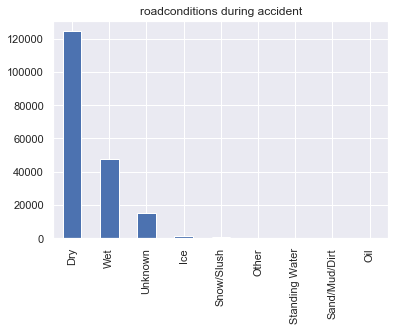

In [80]:
df_rd_1.plot(kind='bar', title='roadconditions during accident')

In [81]:
df_rd_1.head(10)

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [101]:
df_rd_wrth = df[['SEVERITYCODE', 'ROADCOND','WEATHER']]

In [102]:
df_rd_wrth.head()

,SEVERITYCODE,ROADCOND,WEATHER
0,2,Wet,Overcast
1,1,Wet,Raining
2,1,Dry,Overcast
3,1,Dry,Clear
4,2,Wet,Raining


In [103]:
df_rd_wrth.set_index(['SEVERITYCODE'], inplace=True)

In [104]:
df_rd_wrth.head()

,ROADCOND,WEATHER
SEVERITYCODE,,
2,Wet,Overcast
1,Wet,Raining
1,Dry,Overcast
1,Dry,Clear
2,Wet,Raining


In [112]:
df_lc=df[['LIGHTCOND','SEVERITYCODE']]

In [114]:
df_lc_1=df_lc['LIGHTCOND'].value_counts()

In [117]:
df_lc_1.head(15)

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

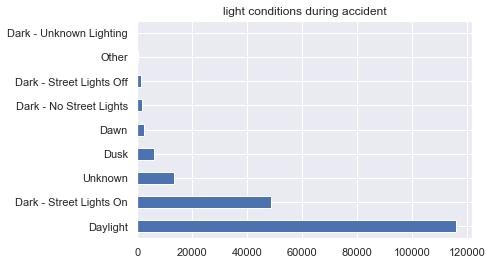

In [118]:
df_lc_1.plot(kind='barh', title='light conditions during accident')

The plot of lightconditions shows that most of the accidents occurred during daytime followed by when dark but street lights on. Unknown conditions, dusk, down, dark-no street lights, dark-street lights off follow respectively. 

*ii. driving information analysis: Speeding, Vehicle count, person count, pedistrian/ cycle, pedstrian count, hit parked car*

In [119]:
#Speeding data is not complete, hence moving on to vehicle count

In [120]:
df_vh=df[['VEHCOUNT', 'SEVERITYCODE']]

In [146]:
df_vh1=df_vh['VEHCOUNT'].value_counts().reset_index().values

In [148]:
df_vh1 #it is an array

array([[     2, 147650],
       [     1,  25748],
       [     3,  13010],
       [     0,   5085],
       [     4,   2426],
       [     5,    529],
       [     6,    146],
       [     7,     46],
       [     8,     15],
       [     9,      9],
       [    11,      6],
       [    10,      2],
       [    12,      1]])

In [149]:
df_vh2= pd.DataFrame(data=df_vh1[:,:])#converting array into an dataframe

In [150]:
df_vh2.head()

,0,1
0,2,147650
1,1,25748
2,3,13010
3,0,5085
4,4,2426


In [163]:
#chaging the header and index
df_vh2.columns=['num_vehicle','occurance']
df_vh2=df_vh2.set_index('num_vehicle')

In [164]:
df_vh2.head()

,occurance
num_vehicle,
2,147650
1,25748
3,13010
0,5085
4,2426


In [171]:
df_vh_11=df_vh2.iloc[0:5, :]
df_vh_12=df_vh2.iloc[5:13, :] #break the dataframe into two to get better plots. 

In [172]:
df_vh_11.head()

,occurance
num_vehicle,
2,147650
1,25748
3,13010
0,5085
4,2426


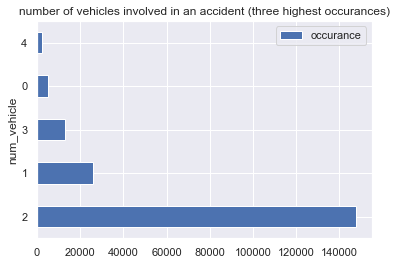

In [173]:
df_vh_11.plot(kind='barh', title='number of vehicles involved in an accident (three highest occurances)')

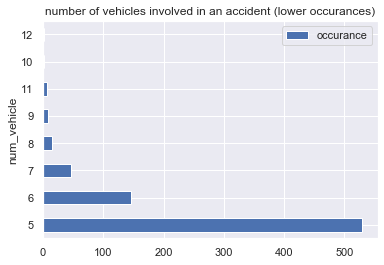

In [174]:
df_vh_12.plot(kind='barh', title='number of vehicles involved in an accident (lower occurances)')

From the two figures above we see that most accidents more than 140,000 have two cars, followed by accidesnts involving one car, then three, zero cars and four cars. Highest number of cars reported in this data set is 12 with one such recorded accident. 

In [178]:
df_vh3=df[['SEVERITYCODE','VEHCOUNT']]
df_vh3=df_vh3.set_index('SEVERITYCODE')
df_vh3.head()

,VEHCOUNT
SEVERITYCODE,
2,2
1,2
1,3
1,3
2,2


In [179]:
df_vh3.groupby(['SEVERITYCODE']).count()

,VEHCOUNT
SEVERITYCODE,
1,136485
2,58188


It is observed that for given data of vehicle count accidents most of the accidents were responsible for property damage than personnel injury. 

In [184]:
#Next let's explore the personcount column
df_pc=df[['SEVERITYCODE','PERSONCOUNT',]]
df_pc.groupby(['PERSONCOUNT']).count()
df_pc1=df_pc['PERSONCOUNT'].value_counts().reset_index().values

In [191]:
#df_pc1is an arrary too, let's change it into an dataframe
df_pc2= pd.DataFrame(data=df_pc1[:,:])#converting array into an dataframe
#chaging the header and index
df_pc2.columns=['PERSONCOUNT','occurance']
df_pc2=df_pc2.set_index('PERSONCOUNT')
df_pc2

,occurance
PERSONCOUNT,
2,114231
3,35553
4,14660
1,13154
5,6584
0,5544
6,2702
7,1131
8,533


In [192]:
df_pc_11=df_pc2.iloc[0:7, :]
df_pc_12=df_pc2.iloc[7: , :] #break the dataframe into two to get better plots. 

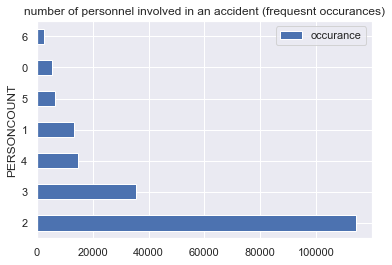

In [193]:
df_pc_11.plot(kind='barh', title='number of personnel involved in an accident (frequesnt occurances)')

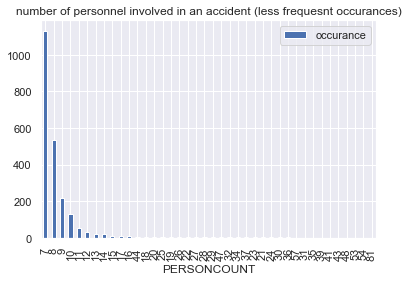

In [196]:
df_pc_12.plot(kind='bar', title='number of personnel involved in an accident (less frequesnt occurances)')

We observe that highest number of accidents reported two peronnel involvement, followed by three, four, one and five. Highest number of personnel involved was 81 in one case. 

In [206]:
#PedCyclcount this column gives us information if the accident involved pedistrian and bicycle. 
df_pct=df[['SEVERITYCODE','PEDCYLCOUNT']]
df_pct1=df_pct['PEDCYLCOUNT'].value_counts().reset_index().values#this is an array
#converting array into an dataframe
df_pct2= pd.DataFrame(data=df_pct1[:,:])
#changing the header and index
df_pct2.columns=['PEDCYLCOUNT', 'occurance']
df_pct2=df_pct2.set_index('PEDCYLCOUNT')
df_pct2

,occurance
PEDCYLCOUNT,
0,189189
1,5441
2,43


This shows that most of the reported accidents do not have ped/ cycle involved in it. 

In [215]:
#PEDCOUNT this column gives us information about pedestrian involved in an accident
df_pdc=df[['SEVERITYCODE', 'PEDCOUNT']]
df_pdc1=df_pdc['PEDCOUNT'].value_counts().reset_index().values#this is an array
#converting array into an dataframe
df_pdc2=pd.DataFrame(data=df_pdc1[:,:])
#changing the header and index
df_pdc2.columns=['PEDCOUNT','occurance']
df_pdc2=df_pdc2.set_index('PEDCOUNT')
df_pdc2

,occurance
PEDCOUNT,
0,187734
1,6685
2,226
3,22
4,4
6,1
5,1


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

We see that most of the occurances had no pedestrians involved. 

In [239]:
#SPEEDING this column has very few responses (only 9333) let's check this column and see what it tells us. 
df_s=df[['SEVERITYCODE','SPEEDING']]
df_s['SPEEDING'].fillna('N',inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [240]:
df_s=df_s.set_index('SEVERITYCODE')
df_s.head()

,SPEEDING
SEVERITYCODE,
2,N
1,N
1,N
1,N
2,N


In [241]:
count_scode=df_s.groupby(['SEVERITYCODE']).count()
count_speeding=df_s['SPEEDING'].value_counts().reset_index().values

In [242]:
count_scode

,SPEEDING
SEVERITYCODE,
1,136485
2,58188


In [243]:
count_speeding

array([['N', 185340],
       ['Y', 9333]], dtype=object)

The above array shows that there were 9333 incidents that involved a speeding car, thus giving this a rather low priotity, however, we need to understand relationship between severity and speeding. 

In [244]:
from scipy import stats

In [249]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


We can see that non of these columns which have datatype float or int, we see that none of them have a strong correlation to SEVERITYCODE. 

This bring us to the plan for developing a ML model. We will emphasize on weather, roadcondition, and light conditions, while taking into consideration, vehicular attributes like vehicle count, personcount, pedcount, hitparkcar in our decision tree model. 